<a href="https://colab.research.google.com/github/adib0073/DataViz_Workshop/blob/main/Data_Viz_Workshop_Day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization Tools and Libraries

### Part2: Exploratory Data Analysis in Data Science through Matplotlib, Seaborn, Pandas and NumPy in Python

We will cover the following topics in this session:
1. Loading Data and Data Inspection using Pandas
2. Data Distribution using Histograms
3. Univariate Analysis using Bar plots, Count Plots, Scatter Plots
4. Univariate Analysis using Kernel Density Plots, Pie Charts, Step Plots
5. Bivariate analysis using Pairplots, Box plots, Violin Plots, Stacked plots
6. Missing Value Visualization
6. Correlation Visualization using Heatmaps
7. Customizing Matplotlib and Seaborn Visualization
8. Plots for ML Model Evaluation
9. Other visualizations: Word Clouds, Sankey Plots, Radar plots


### About the dataset

Heart Disease Dataset- https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

The Heart Disease Dataset is used to solve the problem of classifying whether a patient will have heart disease or not, which is a Binary Classification problem. The data used for this assignment is obtained from Kaggle. This dataset is a processed version of the actual Cleveland database data obtained from UCI Datasets. This problem and the dataset are interesting because the dataset has multiple feature attributes (13 feature attributes) and each of these features are of different types (combination of continuous and categorical values) and the scale of the continuous values are completely different and it will be interesting to see how the Machine Learning algorithms perform on this. Also, the number of records is limited (around 303 records) and there are some outliers observed within the data. So, it will be really interesting to see how our Machine Learning Algorithms can be used to generalize on such a limited dataset with noise. And finally predicting heart disease can have real life use case and application, so that’s why I felt this would be a good problem to investigate.


### Data Description

1. `age` (Age of the patient in years)
2. `sex` (Male/Female)
3. `chest_pain_type` : chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
4. `resting_bp` : resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
5. `cholestoral` (serum cholesterol in mg/dl)
6. `fasting_blood_sugar` (if fasting blood sugar > 120 mg/dl)
7. `restecg` (resting electrocardiographic results) -> Values: [normal, stt abnormality, lv hypertrophy]
8. `max_hr`: maximum heart rate achieved
9. `exang`: exercise-induced angina (True/ False)
10. `oldpeak`: ST depression induced by exercise relative to rest
11. `slope`: the slope of the peak exercise ST segment
12. `num_major_vessels`: number of major vessels (0-3) colored by fluoroscopy
13. `thal`: [normal; fixed defect; reversible defect]
14. `num`: the predicted attribute

### Importing libraries in Python

In [1]:
# Importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Loading data and Data inspection

In [3]:
# Downloading data and loading data as a data frame
data = pd.read_csv("https://raw.githubusercontent.com/adib0073/Educative_SSDS_course/main/data/heart_disease.csv")
data.head()

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking Missing Values

In [10]:
data.isnull().sum()

age                    0
gender                 0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

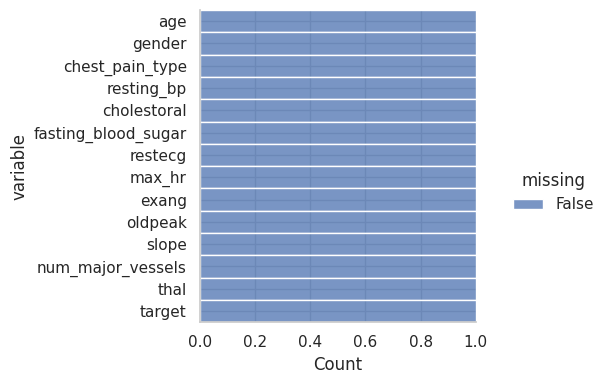

In [14]:
# Let's check missing values
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=4,
    aspect=1.3
)
plt.show()

### Predictor variable analysis

In [7]:
# Separating Categorical and Continuous Numerical Variables
categorical = ['gender','chest_pain_type', 'fasting_blood_sugar', 'restecg', 'exang', 'slope', 'thal']
continuous = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak', 'num_major_vessels']

In [16]:
# Descriptive Statistics for Numerical Variables

data[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
num_major_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


In [19]:
# Frequency for Categorical Variables
for variable in categorical:
  print(data[variable].value_counts())

1    207
0     96
Name: gender, dtype: int64
0    143
2     87
1     50
3     23
Name: chest_pain_type, dtype: int64
0    258
1     45
Name: fasting_blood_sugar, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exang, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


### Data Distribution Check using Histogram

Data Distribution


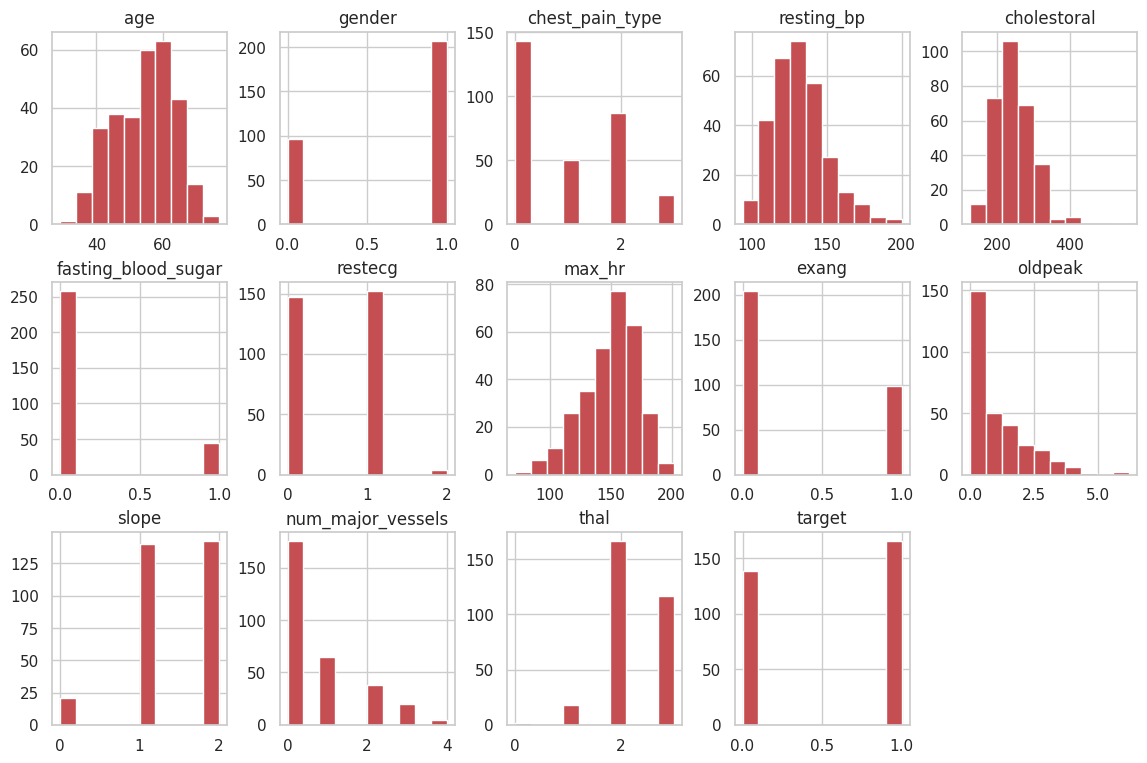

In [23]:
data.hist(layout = (3,5), figsize=(14,9), color = 'r')
print('Data Distribution')